# Training

In [1]:
%env CUDA_VISIBLE_DEVICES=0
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import logging

import matplotlib.pyplot as plt
import numpy as np

import sys; sys.path.append("../")
import maskflow

root_dir = Path("/home/hadim/.data/Neural_Network/Maskflow/Shapes")
data_dir = root_dir / "Data"
model_dir = root_dir / "Models"
model_dir.mkdir(exist_ok=True)

# Import the configuration associated with this dataset and network.
config = maskflow.config.load_config(root_dir / "config.yaml")

env: CUDA_VISIBLE_DEVICES=0


## Check Dataset

2018-11-03 16:08:03,855:WARNING:maskrcnn_benchmark.data.build: When using more than one image per GPU you may encounter an out-of-memory (OOM) error if your GPU does not have sufficient memory. If this happens, you can reduce SOLVER.IMS_PER_BATCH (for training) or TEST.IMS_PER_BATCH (for inference). For training, you must also adjust the learning rate and schedule length according to the linear scaling rule. See for example: https://github.com/facebookresearch/Detectron/blob/master/configs/getting_started/tutorial_1gpu_e2e_faster_rcnn_R-50-FPN.yaml#L14


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


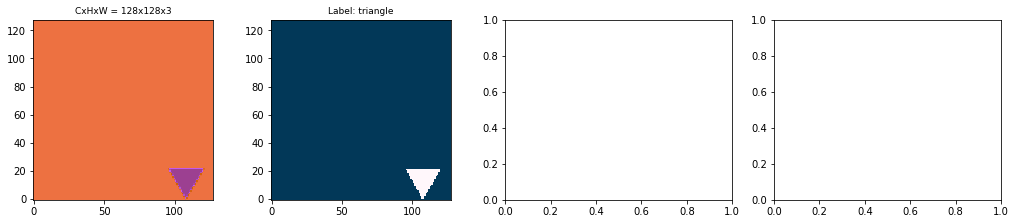

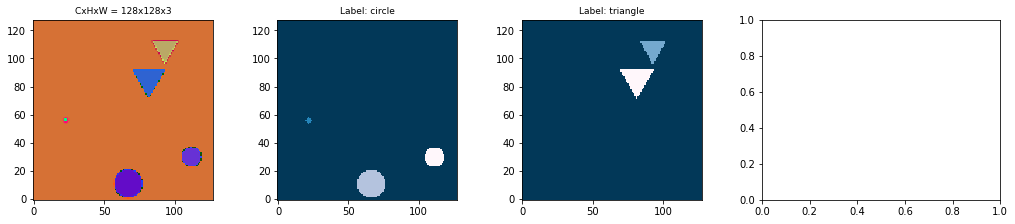

In [2]:
config['SOLVER']['IMS_PER_BATCH'] = 2
config['TEST']['IMS_PER_BATCH'] = 2

# Load some data
data_loader = maskflow.dataset.get_data_loader(config, data_dir, is_train=True)
some_data = [iter(data_loader).next() for _ in range(1)]

# Retrieve category's names
categories = data_loader.dataset.coco.cats

for batch_image, batch_target, batch_idx in some_data:
    maskflow.viz.batch_display_top_masks(batch_image, batch_target, batch_idx, categories,
                                         basesize=14, limit=3, cmap="PuBu_r")

## Training

In [3]:
# Use the last model in the model dir
# If False, create a new model from scratch.
# If `model_to_use` is set, we use this one instead.
use_last_model = True
model_to_use = None

# Configure the training
config['DATA_DIR'] = str(data_dir)

config['MODEL']['DEVICE'] = "cuda"

config['DATALOADER']['NUM_WORKERS'] = 16
config['SOLVER']['IMS_PER_BATCH'] = 8

config['SOLVER']['MAX_ITER'] = 5000
config['SOLVER']['BASE_LR'] = 0.001
config['SOLVER']['STEPS'] = [40, 80]
config['SOLVER']['CHECKPOINT_PERIOD'] = 50

In [ ]:
# Setup training
training_args, current_model_path = maskflow.training.build_model(config,
                                                                  model_dir,
                                                                  use_last_model=use_last_model,
                                                                  model_to_use=model_to_use)

# Train
from maskrcnn_benchmark.engine.trainer import do_train

logging.info(f"Start training at iteration {training_args['arguments']['iteration']}")
do_train(**training_args)

2018-11-03 16:08:08,823:INFO:root: Training model directory set: /home/hadim/.data/Neural_Network/Maskflow/Shapes/Models/2018.11.03-16:03:47
2018-11-03 16:08:08,824:INFO:root: Building the model...
2018-11-03 16:08:11,348:INFO:maskrcnn_benchmark.utils.checkpoint: No checkpoint found. Initializing model from scratch
2018-11-03 16:08:11,349:INFO:root: Create the data loader.
2018-11-03 16:08:11,350:WARNING:maskrcnn_benchmark.data.build: When using more than one image per GPU you may encounter an out-of-memory (OOM) error if your GPU does not have sufficient memory. If this happens, you can reduce SOLVER.IMS_PER_BATCH (for training) or TEST.IMS_PER_BATCH (for inference). For training, you must also adjust the learning rate and schedule length according to the linear scaling rule. See for example: https://github.com/facebookresearch/Detectron/blob/master/configs/getting_started/tutorial_1gpu_e2e_faster_rcnn_R-50-FPN.yaml#L14
2018-11-03 16:08:11,373:INFO:root: Model ready to be use.
2018-11

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2018-11-03 16:08:12,582:INFO:maskrcnn_benchmark.trainer: eta: 1:40:18  iter: 0  loss: 21.4821 (21.4821)  loss_classifier: 2.2010 (2.2010)  loss_box_reg: 0.0093 (0.0093)  loss_mask: 17.5031 (17.5031)  loss_objectness: 0.7521 (0.7521)  loss_rpn_box_reg: 1.0165 (1.0165)  time: 1.2036 (1.2036)  data: 0.7267 (0.7267)  lr: 0.000330  max mem: 836
2018-11-03 16:08:22,678:INFO:maskrcnn_benchmark.trainer: eta: 0:44:39  iter: 20  loss: 4.6097 (6.3245)  loss_classifier: 0.4606 (0.6002)  loss_box_reg: 0.0081 (0.0094)  loss_mask: 3.2332 (4.7844)  loss_objectness: 0.3807 (0.4391)  loss_rpn_box_reg: 0.4622 (0.4914)  time: 0.5056 (0.5381)  data: 0.0005 (0.0481)  lr: 0.000357  max mem: 1169
2018-11-03 16:08:33,143:INFO:maskrcnn_benchmark.trainer: eta: 0:43:52  iter: 40  loss: 1.8605 (4.1797)  loss_classifier: 0.3595 (0.4912)  loss_box_reg: 0.0181 (0.0157)  loss_mask: 0.7581 (2.8712)  loss_objectness: 0.3348 (0.3857)  loss_rpn_box_reg: 0.3276 (0.4159)  time: 0.5241 (0.5308)  data: 0.0006 (0.0325)  lr: 0.